In [ ]:
#Importamos librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo xlsx desde equipo
from google.colab import files#orden que hace que el código busque el documento en la computadora
files.upload()

In [ ]:
#Carga desde archivo .csv sin indice
micro=pd.read_csv("lastmile_delivery_operations_mit_lift_lab.csv")#lee el excel y se ponemos el nombre para que lo pueda leer
micro

In [ ]:
#Verificamos información del DataFrame
micro.info() #Se ve toda la forma del documento

In [ ]:
#Carga desde archivo excel sin indice
data=pd.read_csv("lastmile_delivery_operations_mit_lift_lab.csv")
data.head() #te deja ver los primeros datos de las filas y columnas como excel

Tenemos que quitar valores nulos

In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
micro['_title']=micro['_title'].fillna("_title")
micro

In [ ]:
#Corroboramos valores nulos
valores_nulos=micro.isnull().sum()#muestra los datos que tiene valores nulos y cuanto son
valores_nulos

_record_id                                         0
_title                                             0
_server_updated_at                                 0
_updated_by                                        0
_geometry                                          0
_latitude                                          0
_longitude                                         0
arrival_of_the_freight_vehicle                     0
plates                                             1
company_if_visible                                73
visit_purpose                                      0
type_of_vehicle                                    0
number_of_operators                                0
refrigerated_truck                                 0
type_of_cargo                                      0
picture_of_the_parked_freight_vehicle              0
departure_of_the_freight_vehicle                   0
where_was_the_vehicle_parked                       0
while_parked_was_the_engine_running           

In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
micro['describe_the_accident']=micro['describe_the_accident'].fillna("describe_the_accident")
micro

In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
micro['maximum_number_of_vehicles_in_the_traffic_jam']=micro['maximum_number_of_vehicles_in_the_traffic_jam'].fillna("maximum_number_of_vehicles_in_the_traffic_jam")
micro

In [ ]:
#Corroboramos valores nulos
valores_nulos=micro.isnull().sum()
valores_nulos

In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
micro['arrival_of_the_freight_vehicle']=micro['arrival_of_the_freight_vehicle'].fillna("arrival_of_the_freight_vehicle")
micro
  

In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
micro['serving_customer']=micro['serving_customer'].fillna("serving_customer")
micro
 

In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
micro['company_if_visible']=micro['company_if_visible'].fillna("company_if_visible")
micro


In [ ]:
#Corroboramos valores nulos
valores_nulos=micro.isnull().sum()
valores_nulos

_record_id                                       0
_title                                           0
_server_updated_at                               0
_updated_by                                      0
_geometry                                        0
_latitude                                        0
_longitude                                       0
arrival_of_the_freight_vehicle                   0
plates                                           1
company_if_visible                               0
visit_purpose                                    0
type_of_vehicle                                  0
number_of_operators                              0
refrigerated_truck                               0
type_of_cargo                                    0
picture_of_the_parked_freight_vehicle            0
departure_of_the_freight_vehicle                 0
where_was_the_vehicle_parked                     0
while_parked_was_the_engine_running              0
used_traffic_cone              

**Observamos que solo falta uno**

In [ ]:
#tercer metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
micro['plates']=micro['plates'].fillna("plates")
micro


In [ ]:
#Corroboramos valores nulos
valores_nulos=micro.isnull().sum()
valores_nulos

In [ ]:
#Corroboramos valores nulos
valores_nulos=micro.isnull().sum().sum()#Comprobamos que ya no haya valores nulos 
valores_nulos

0

**Procedimiento "Cuantiles" para sustituir outliers en dataframe**



<Figure size 1080x576 with 0 Axes>

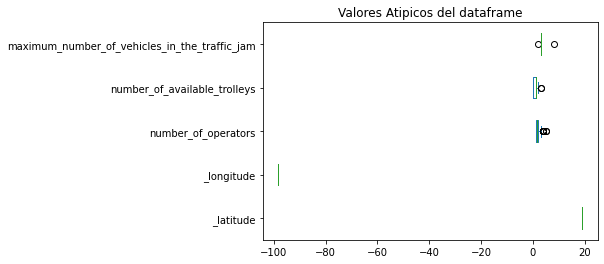

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(15,8))#muestra el tamaño en que se muestra la imagen
micro.plot(kind='box',vert=False)#genera la caja o bigote y la grafica de todas las columnas que contengan valores atípicos
plt.title("Valores Atipicos del dataframe") # coloca el nombre de la grafica 
plt.show()# Dibujamos el diagrama 


In [ ]:
from numpy.lib.function_base import percentile  
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=micro['number_of_available_trolleys']#llama a la columna a la que se le quitarán los valores atípicos
percentile25=y.quantile(0.25) #Q1#se usa un porcentaje de 25 como límite inferior
percentile75=y.quantile(0.75) #Q3#se usa un porcentaje de 25 como límite superior
iqr=percentile75 -percentile25#hace la resta de los límites
Limite_Superior_iqr=percentile75+1.5*iqr #mide la dispersión con el limite superior
Limite_Inferior_iqr=percentile25-1.5*iqr #mide la dispersión con el limite inferior
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr) #muestran los valores de los límites permitidos

Limite superior permitido 2.5
Limite interior permitido -1.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y<Limite_Superior_iqr)|(y>Limite_Inferior_iqr)]
outliers_iqr#encuentra los valores que se salen del rango de los límites

In [ ]:
#Obtenemos datos limpios
data_clean_iqr=micro[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr#genera los datos limpios de la columna sin valores atípicos

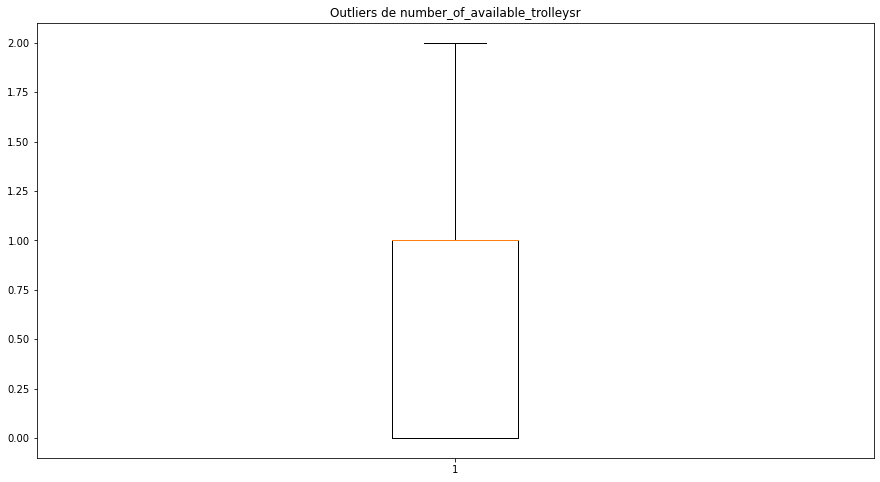

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(15,8)) #muestra el tamaño de la figura
plt.boxplot(data_clean_iqr["number_of_available_trolleys"])#gráfica la caja con los valores ya dentro de los límites de una columna
plt.title("Outliers de number_of_available_trolleysr") #titulo de la grafica
plt.show()# Dibujamos el diagrama 


In [ ]:
#Realizamos una copia del dataframe
micro=data_clean_iqr.copy()

In [ ]:
from numpy.lib.function_base import percentile
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=micro['number_of_operators']#llama a la columna a la que se le quitarán los valores atípicos
percentile25=y.quantile(0.25) #Q1#se usa un porcentaje de 25 como límite inferior
percentile75=y.quantile(0.75) #Q3#se usa un porcentaje de 25 como límite superior
iqr=percentile75 -percentile25#hace la resta de los límites
Limite_Superior_iqr=percentile75+1.5*iqr #mide la dispersión con el limite superior
Limite_Inferior_iqr=percentile25-1.5*iqr #mide la dispersión con el limite inferior
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr) #muestran los valores de los límites permitidos

Limite superior permitido 3.5
Limite interior permitido -0.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr=micro[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

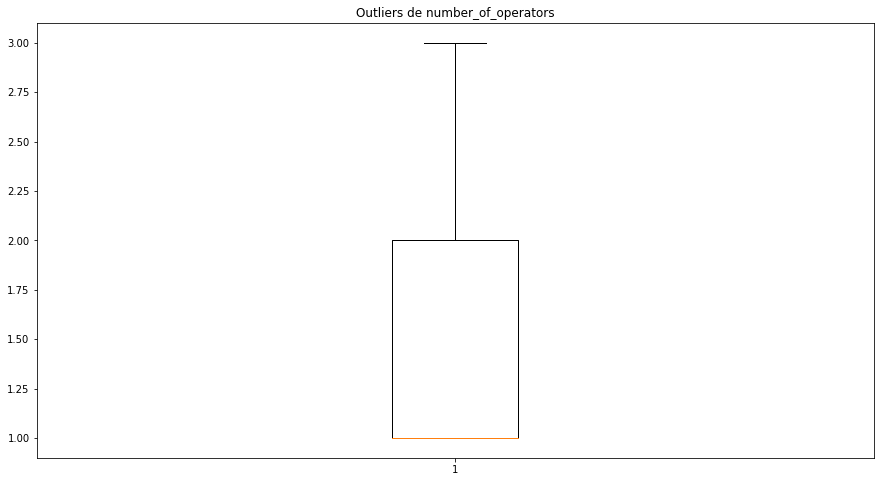

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(15,8)) #muestra el tamaño de la figura
plt.boxplot(data_clean_iqr["number_of_operators"])#gráfica la caja con los valores ya dentro de los límites de una columna
plt.title("Outliers de number_of_operators") #titulo de la grafica
plt.show()# Dibujamos el diagrama 


In [ ]:
#Realizamos una copia del dataframe
data3=data_clean_iqr.copy()

In [ ]:
from numpy.lib.function_base import percentile
#Metodo aplicando Cuartiles. Encuentro cuartilies 0.25 y 0.75
y=micro['maximum_number_of_vehicles_in_the_traffic_jam']
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 -percentile25
Limite_superior_iqr=percentile75 + 1.5*iqr
Limite_inferior_iqr=percentile25 - 1.5*iqr
print('Limite superior permitido',Limite_superior_iqr)
print('Limite inferior permitido', Limite_inferior_iqr)

Limite superior permitido 3.0
Limite inferior permitido 3.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y<Limite_superior_iqr)|(y>Limite_inferior_iqr)]
outliers_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(5,5))
plt.boxplot(data_clean_iqr["maximum_number_of_vehicles_in_the_traffic_jam"])
plt.title("Outliers de maximum_number_of_vehicles_in_the_traffic_jam")
plt.show()# Dibujamos el diagrama 

**Convertir DataSet sin valores nulos a CSV**

In [ ]:
#Convertir dataframe a CSV
micro.to_csv("lastmile_delivery_operaions_Nuevo.csv")
#Descargar archivo filtrado en csv
from google.colab import files


files.download("lastmile_delivery_operaions_Nuevo.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>